# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
## By Vyanna Hill

### Introduction

For this week's assignment, I will look into the 2021 michelle resturant map[^1] to see where the majority of these high class restaurants are located in NYC and if these type of restaurants clusterd in a specifc area(s). 

This scope is under my final project, where I will invesigate if high reported rodent areas dictate if a resutrant has a low food grade score. I like to see if these restaurants are clusterd in a specifc location in NYC, will that location show less vermin sightings than non highly rated food establishments. 

[^1]:https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021

______________
### Data Exploration

The dataset has 14 columns and 6,5586 entries in total. There is a total of 1,518 null items in the dataset. The average Longitutde is around ~28.2 and its longitutde is ~40.56. For the New York entries only, there are 175 michelle star restaurants in NY. The dataset has not set the values for price to be numeric, so let's wrangle our data below to be more usefull

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

data=pd.read_csv("https://raw.githubusercontent.com/ngshiheng/michelin-my-maps/main/data/michelin_my_maps.csv")
#.describe to find summary info of our michelle dataset
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6586 entries, 0 to 6585
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6586 non-null   object 
 1   Address                6586 non-null   object 
 2   Location               6586 non-null   object 
 3   MinPrice               6525 non-null   object 
 4   MaxPrice               6525 non-null   object 
 5   Currency               6525 non-null   object 
 6   Cuisine                6586 non-null   object 
 7   Longitude              6586 non-null   float64
 8   Latitude               6586 non-null   float64
 9   PhoneNumber            6464 non-null   float64
 10  Url                    6586 non-null   object 
 11  WebsiteUrl             5409 non-null   object 
 12  Award                  6586 non-null   object 
 13  FacilitiesAndServices  6550 non-null   object 
dtypes: float64(3), object(11)
memory usage: 720.5+ KB


,Longitude,Latitude,PhoneNumber
count,6586.000000,6586.000000,6.464000e+03
mean,28.179833,40.563652,3.164782e+11
std,66.753364,12.028831,1.515321e+12
min,-123.719444,-23.638434,4.977184e+07
25%,0.775248,35.667979,3.314040e+10
50%,7.656133,43.418271,3.903435e+10
75%,100.565530,48.744993,8.867283e+10
max,139.974332,64.145390,4.981419e+13


In [2]:
#.isnull to check if there are any null entries in the dataset, use .sum to count null entries from each column
data.isnull().values.any()
data.isnull().sum()


Name                        0
Address                     0
Location                    0
MinPrice                   61
MaxPrice                   61
Currency                   61
Cuisine                     0
Longitude                   0
Latitude                    0
PhoneNumber               122
Url                         0
WebsiteUrl               1177
Award                       0
FacilitiesAndServices      36
dtype: int64

In [3]:
#early data wrangling, let's see how many rows are new york only
ny=data[data["Location"].str.contains("New York| NYC| NY| NewYork",regex=True)]
ny.info()

#below is for me to check for any NAs before the wrangle time 
#ny.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 129 to 6420
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   175 non-null    object 
 1   Address                175 non-null    object 
 2   Location               175 non-null    object 
 3   MinPrice               175 non-null    object 
 4   MaxPrice               175 non-null    object 
 5   Currency               175 non-null    object 
 6   Cuisine                175 non-null    object 
 7   Longitude              175 non-null    float64
 8   Latitude               175 non-null    float64
 9   PhoneNumber            170 non-null    float64
 10  Url                    175 non-null    object 
 11  WebsiteUrl             161 non-null    object 
 12  Award                  175 non-null    object 
 13  FacilitiesAndServices  175 non-null    object 
dtypes: float64(3), object(11)
memory usage: 20.5+ KB


### Data Wrangling

In order to use this data set to the best of my abilities, lets transform some columns whose original types did not carry over in the data exploration. For starters, lets convert min/max prices back to integers. The to_numeric function can be used for this conversion seen below.

Another data clean up is dropping rows that do not have a phone number as it can mean these business are no longer active. This drop can be done with re assigning a new data frame to only have non null rows with the .notnull function. Then, we can fill any null cells with "Not Available" as some of these fancy resturants may not give 

In [4]:
#convert prices back to numeric with to_numeric
ny["MinPrice"]=pd.to_numeric(ny["MinPrice"],errors='raise')
ny["MaxPrice"]=pd.to_numeric(ny["MaxPrice"],errors='raise')

#Drop any rows that do not have a phone number and fill any Na's in other columns with "Not Available"
ny=ny[ny["PhoneNumber"].notnull()]
ny["WebsiteUrl"].fillna("Not Available",inplace=True)


C:\Users\walki\AppData\Local\Temp\ipykernel_47600\1246854591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny["MinPrice"]=pd.to_numeric(ny["MinPrice"],errors='raise')
C:\Users\walki\AppData\Local\Temp\ipykernel_47600\1246854591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny["MaxPrice"]=pd.to_numeric(ny["MaxPrice"],errors='raise')
C:\Users\walki\AppData\Local\Temp\ipykernel_47600\1246854591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

###  Visualizations

#### **Part 1:**

##### Location location location!

For this part of the assignment, we can now plot the locations of these businessess. First, let us see if a scatter plot will fit as a basis of our visualization. Looking at our starter plot, this does not really help us visualize where these points belong espically if a non new yorker were to view this plot. Let's pivot towards geopandas for help, where its dataset holds the geometric layout information of NYC. Then, we can see where on the NYC map where these locations are located.

After our map pair, we can clearly see where all the locations are within NYC. We can see that lower manhattan has the largest cluster of the restaurants.

##### Divsion of the Stars

Another look into our map, we don't have the option to magnify the differences in the michelin stars as its on a 1-3 scale. We may work to corporate the difference, but let's look on a overall scale. We can create a group by its star(s) and its speciality type and look at its count through a bar plot.

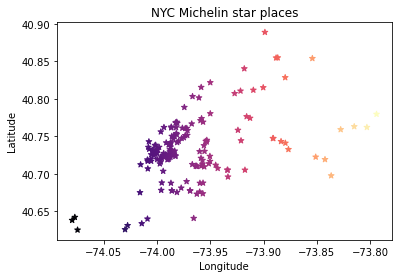

<Figure size 1080x1080 with 0 Axes>

In [5]:
#let's plot the current x and y corridnates below to visualize the current set up
#For some fun, let's set the color of the location by longitude
plt.scatter(ny.Longitude,ny.Latitude,c=ny.Longitude, cmap="magma",marker="*")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("NYC Michelin star places")
plt.figure(figsize=(15,15))
plt.show()


#we can improve, let's use Geopandas to layer these points on a borough graph to make the visualization eaiser to follow
#First, create a geo data frame to convert the x/y corridinates into points
geo_nyc=gpd.GeoDataFrame(ny,geometry=gpd.points_from_xy(ny.Longitude,ny.Latitude))

#load the NYC Map from geopandas w/ get_path for NYC bouroughs
nyc_map= gpd.read_file(gpd.datasets.get_path("nybb"))

#Let's match our corridnates to our geo_nyc by changing the preset map from feet to degrees
nyc_map=nyc_map.to_crs("EPSG:4326")


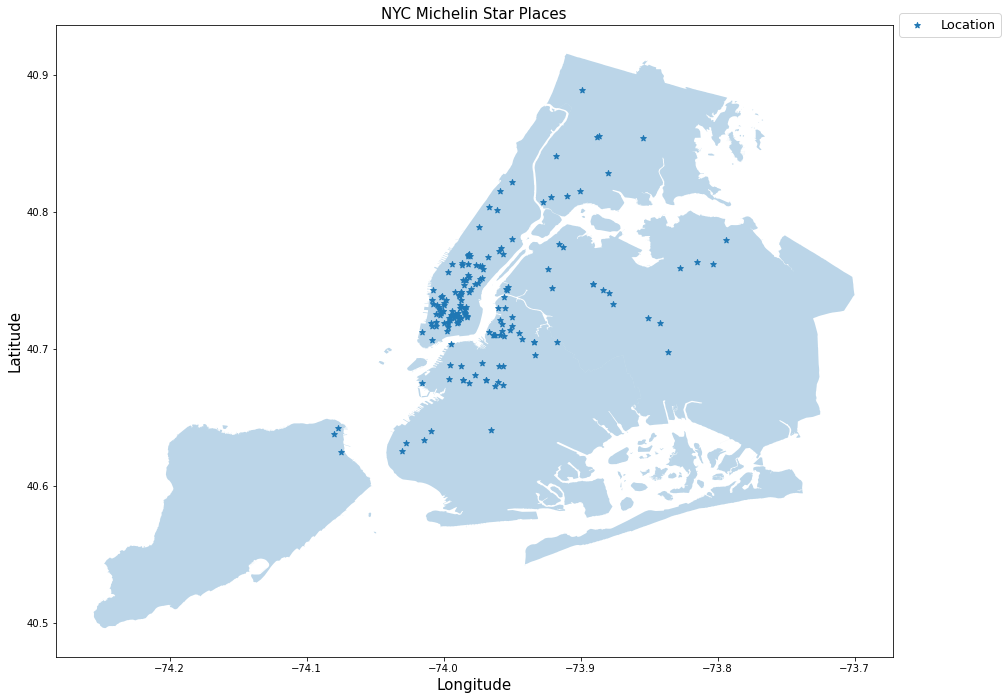

In [6]:
#Now the base layer is set, let's set the axis be the base layer's dimensions and plot our points 
axis=nyc_map.plot(figsize=(15,15),alpha=0.3)
geo_nyc.plot(ax=axis,marker="*")

#add in lables for our axis and create a legend to identify the points on the map as locations
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("NYC Michelin Star Places",fontsize=15)
plt.legend(["Location"],bbox_to_anchor = (1 , 1),fontsize=13,loc="center left")

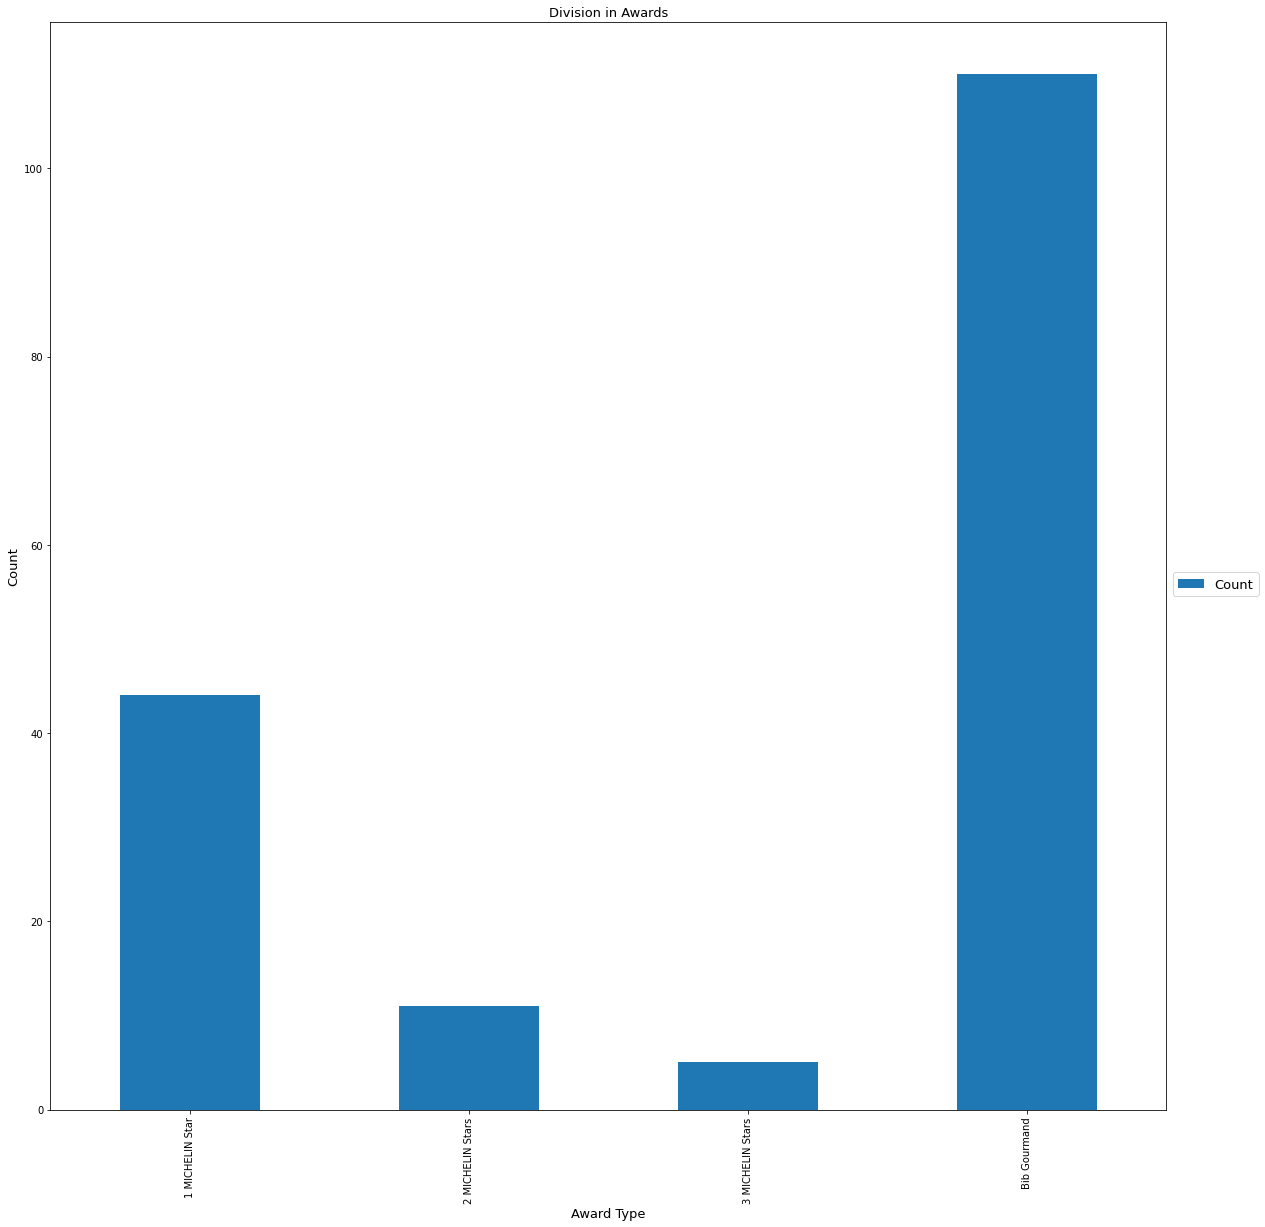

In [7]:
#Create a sub data frame and create a bar plot by stars and their speciality
#sub_stars=ny.groupby(["Award","Cuisine"]).size().unstack().plot(kind='bar',figsize=(20,20))
sub_stars=ny.groupby(["Award"]).size().plot(kind='bar',figsize=(20,20))
plt.xlabel("Award Type",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Division in Awards",fontsize=13)
plt.legend(["Count"],bbox_to_anchor = (1 , 0.5),fontsize=13)


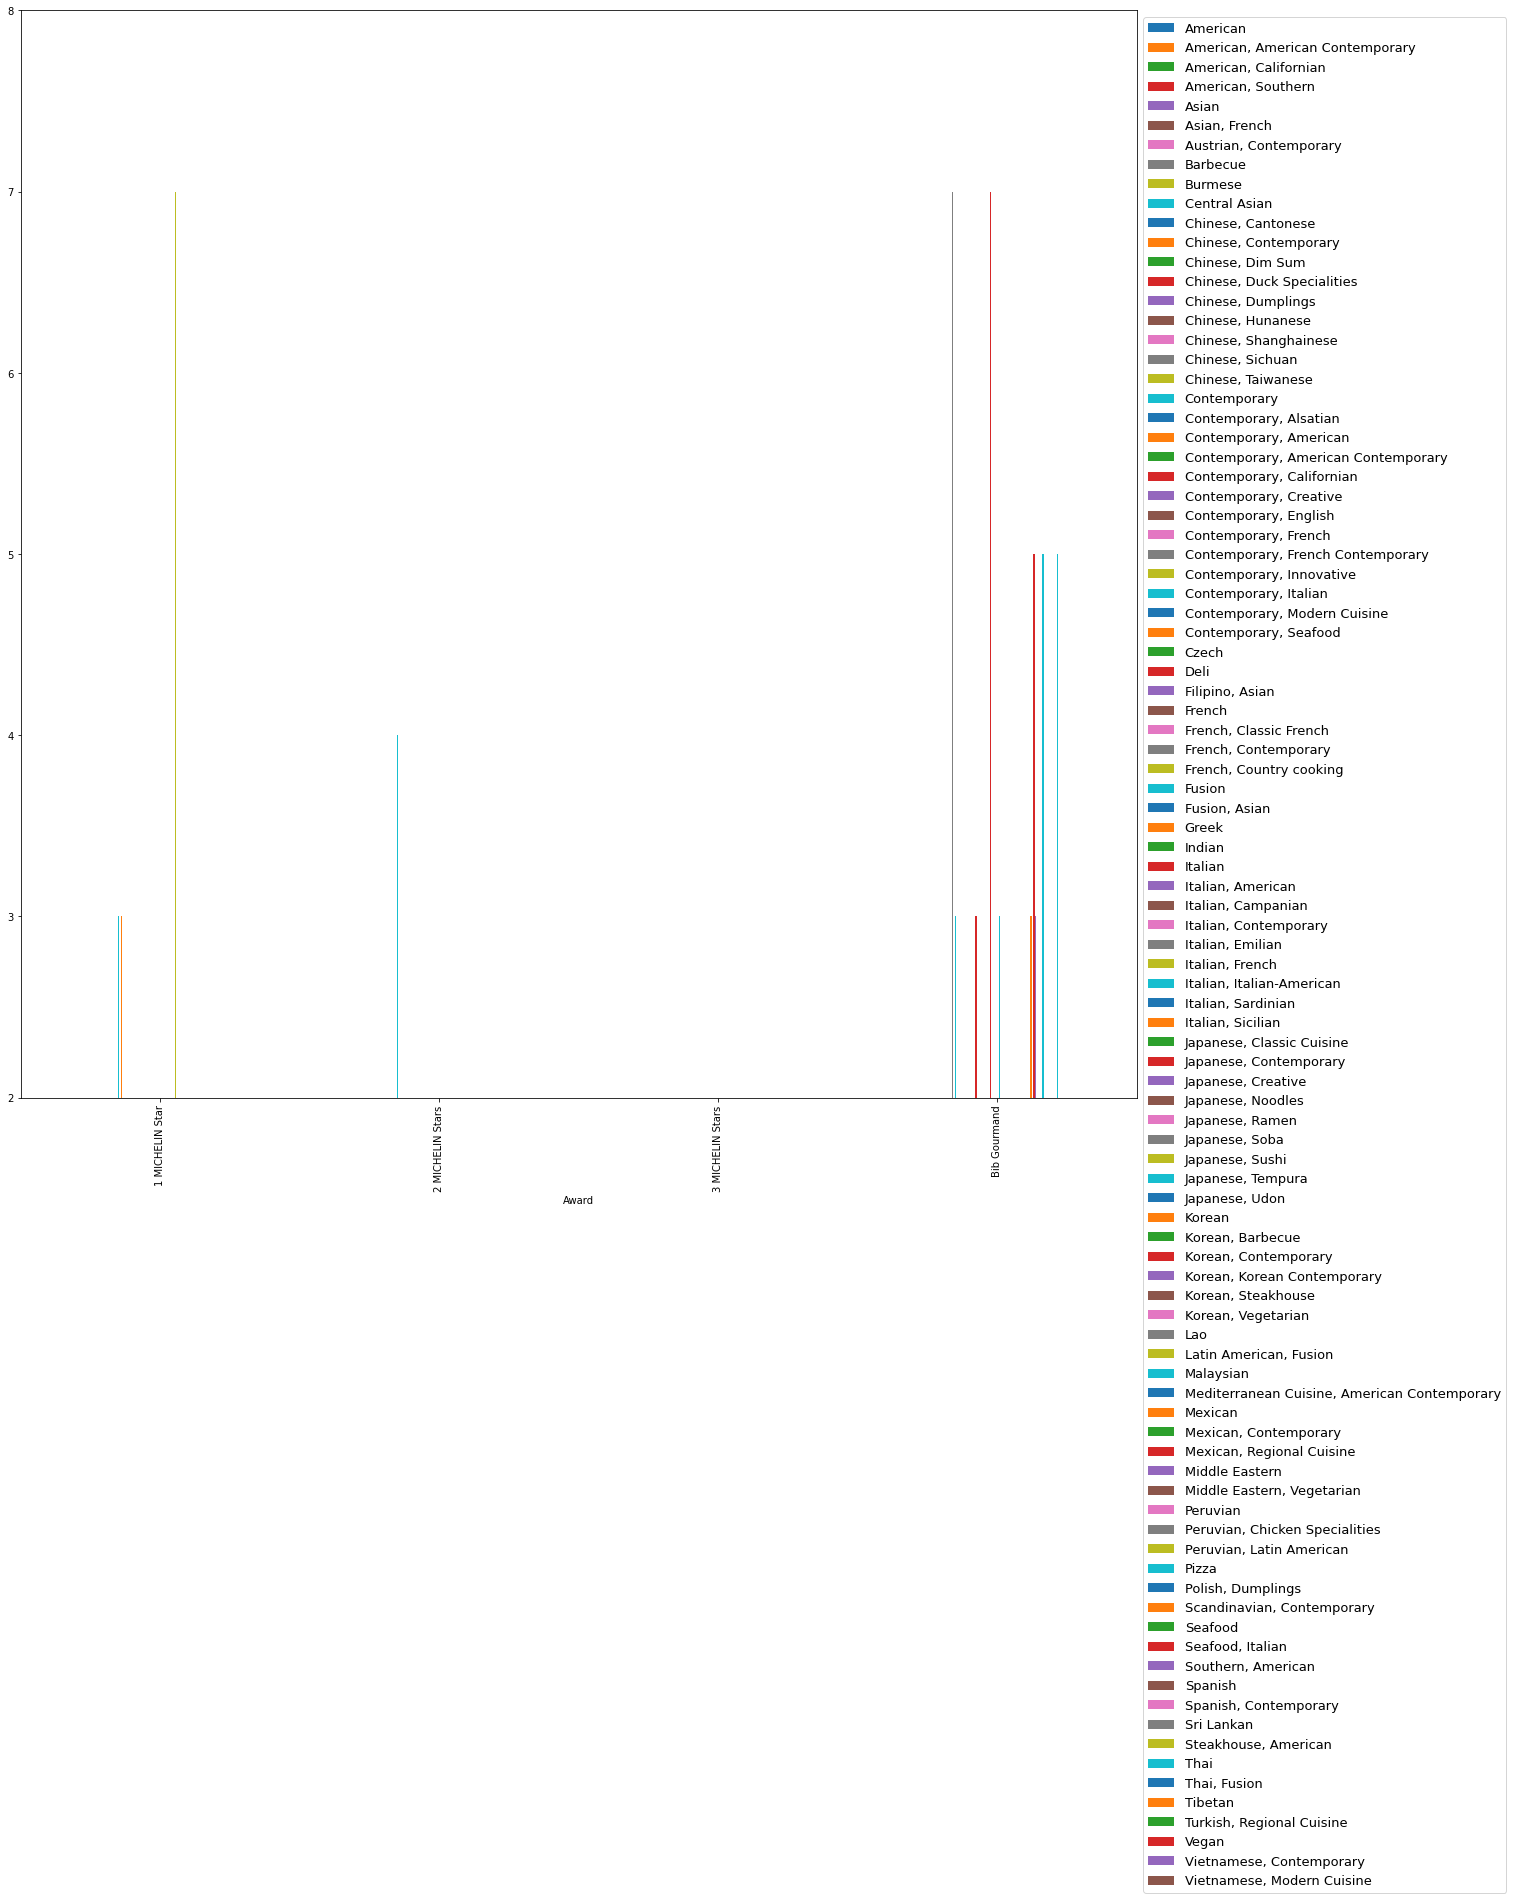

In [8]:
#see top awards from top cuisines
sub_stars=sub_stars=ny.groupby(["Award","Cuisine"]).size().unstack().plot(kind='bar',figsize=(20,20))
plt.ylim(2,8)
plt.legend(bbox_to_anchor = (1 , 1),fontsize=13)


Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

*   Use and change a legend position   :)
*   Change a legend font size    :)
*   Place a legend outside of the plot  :) 
*   Create a single legend for all subplots
*   Change the title and x/y labels                :)
*   Change the marker, line colors, and line width  :)
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels  :)
*   Your own choice not included above 


#### **Part 2:** Recreating the plots in seaborn

For this section, I try to the best of my abilities to recreate the plots above. One issue for the first, I cannot use seaborn to layer the two graph as its appears seaborn does not have the functionality to work with spatial data. Further, I cannot plot my NY map like the second type above, as seaborn does not have cross functionality with geopandas at the momment. For now, we can recreate the first scatter plot above with all of the desgin elements used in the second scatter.

For our bar plot, we can re-create both of our barplot as its only slight changes in the code.

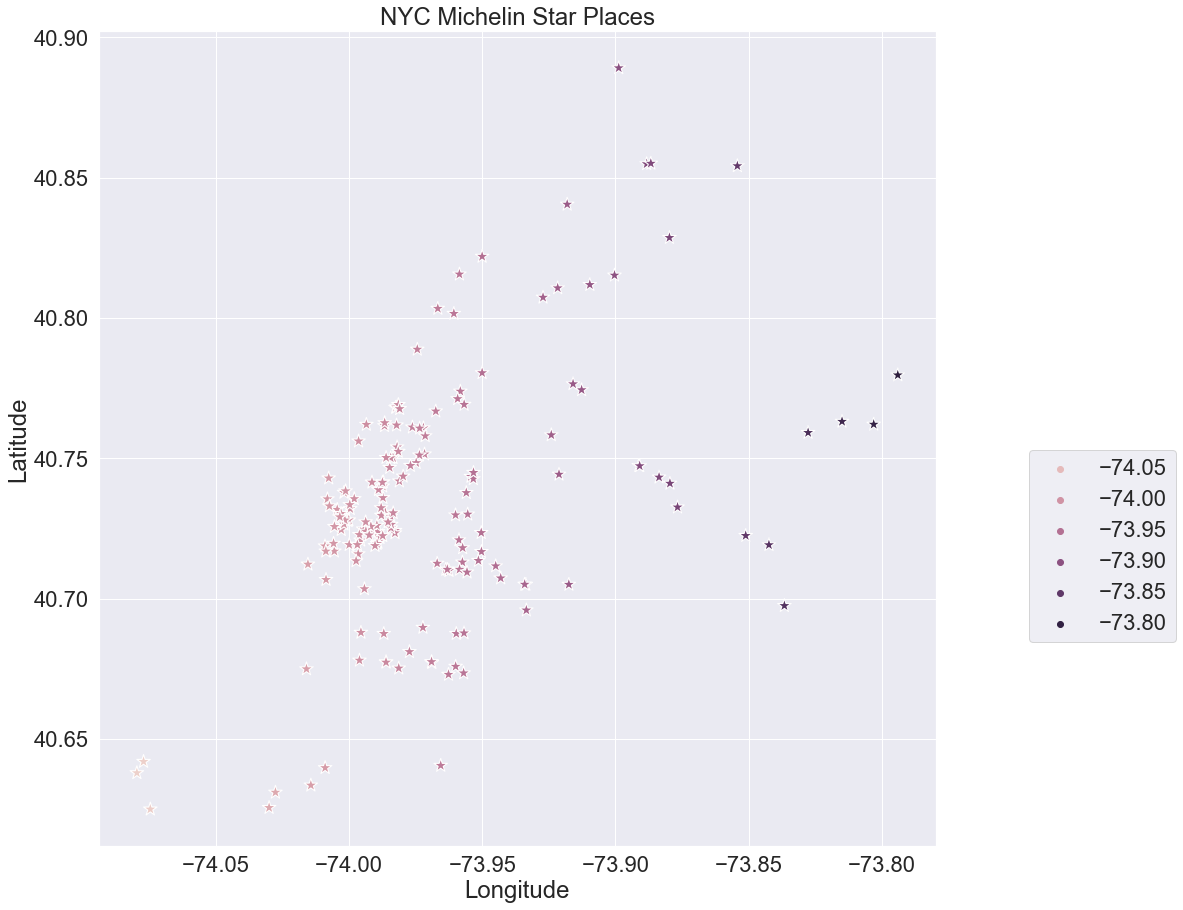

In [9]:
#creating the scatter plot above with seaborn
#Difference- setting figure size and font for the overall figure with .set,
#Seaborn has different font sizes than matplotlib which shows variances in font sizes
sns.set(rc={"figure.figsize":(15, 15)})
sns.set(font_scale=2)

#Can append a title with .set along the scatter plot creation, We can also set the color map to be set by its longitude
#Seaborn can use the column titles as its axis labels unlike matplotlib
sea_scatter=sns.scatterplot(data=ny,x="Longitude",y="Latitude",hue="Longitude",marker="*",s=200).set(title="NYC Michelin Star Places")
plt.legend(bbox_to_anchor = (1.3,0.5))

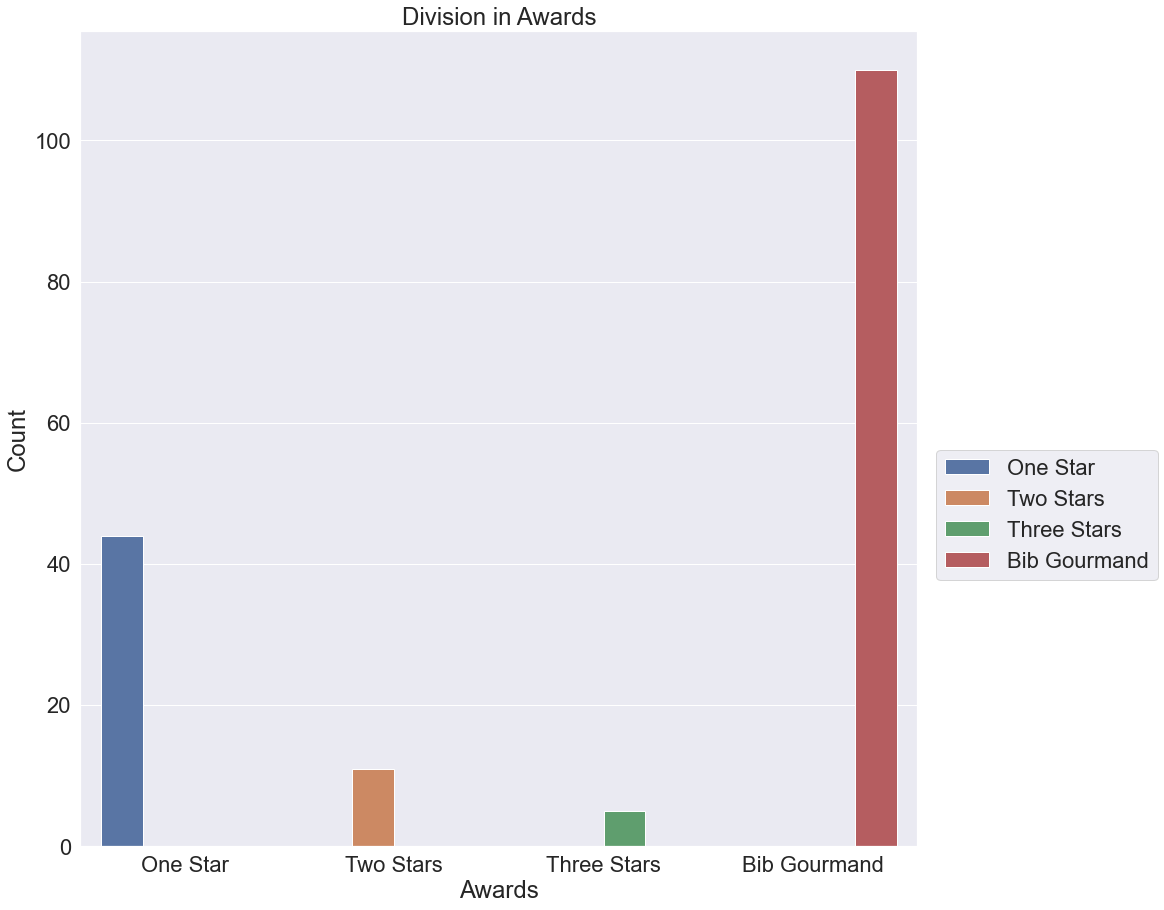

In [10]:
#Creating a stacked bar plot in seaborn
#seaborn cannot access the first group by fuction through .plot so we have to create a seperate dataframe
sub_stars=pd.DataFrame({'Awards':["One Star","Two Stars","Three Stars","Bib Gourmand"],'Count':[44,11,5,110] })
sea_stars=sns.barplot(data=sub_stars,x="Awards",y="Count",hue="Awards").set(title="Division in Awards")
plt.legend(bbox_to_anchor = (1.3,0.5))

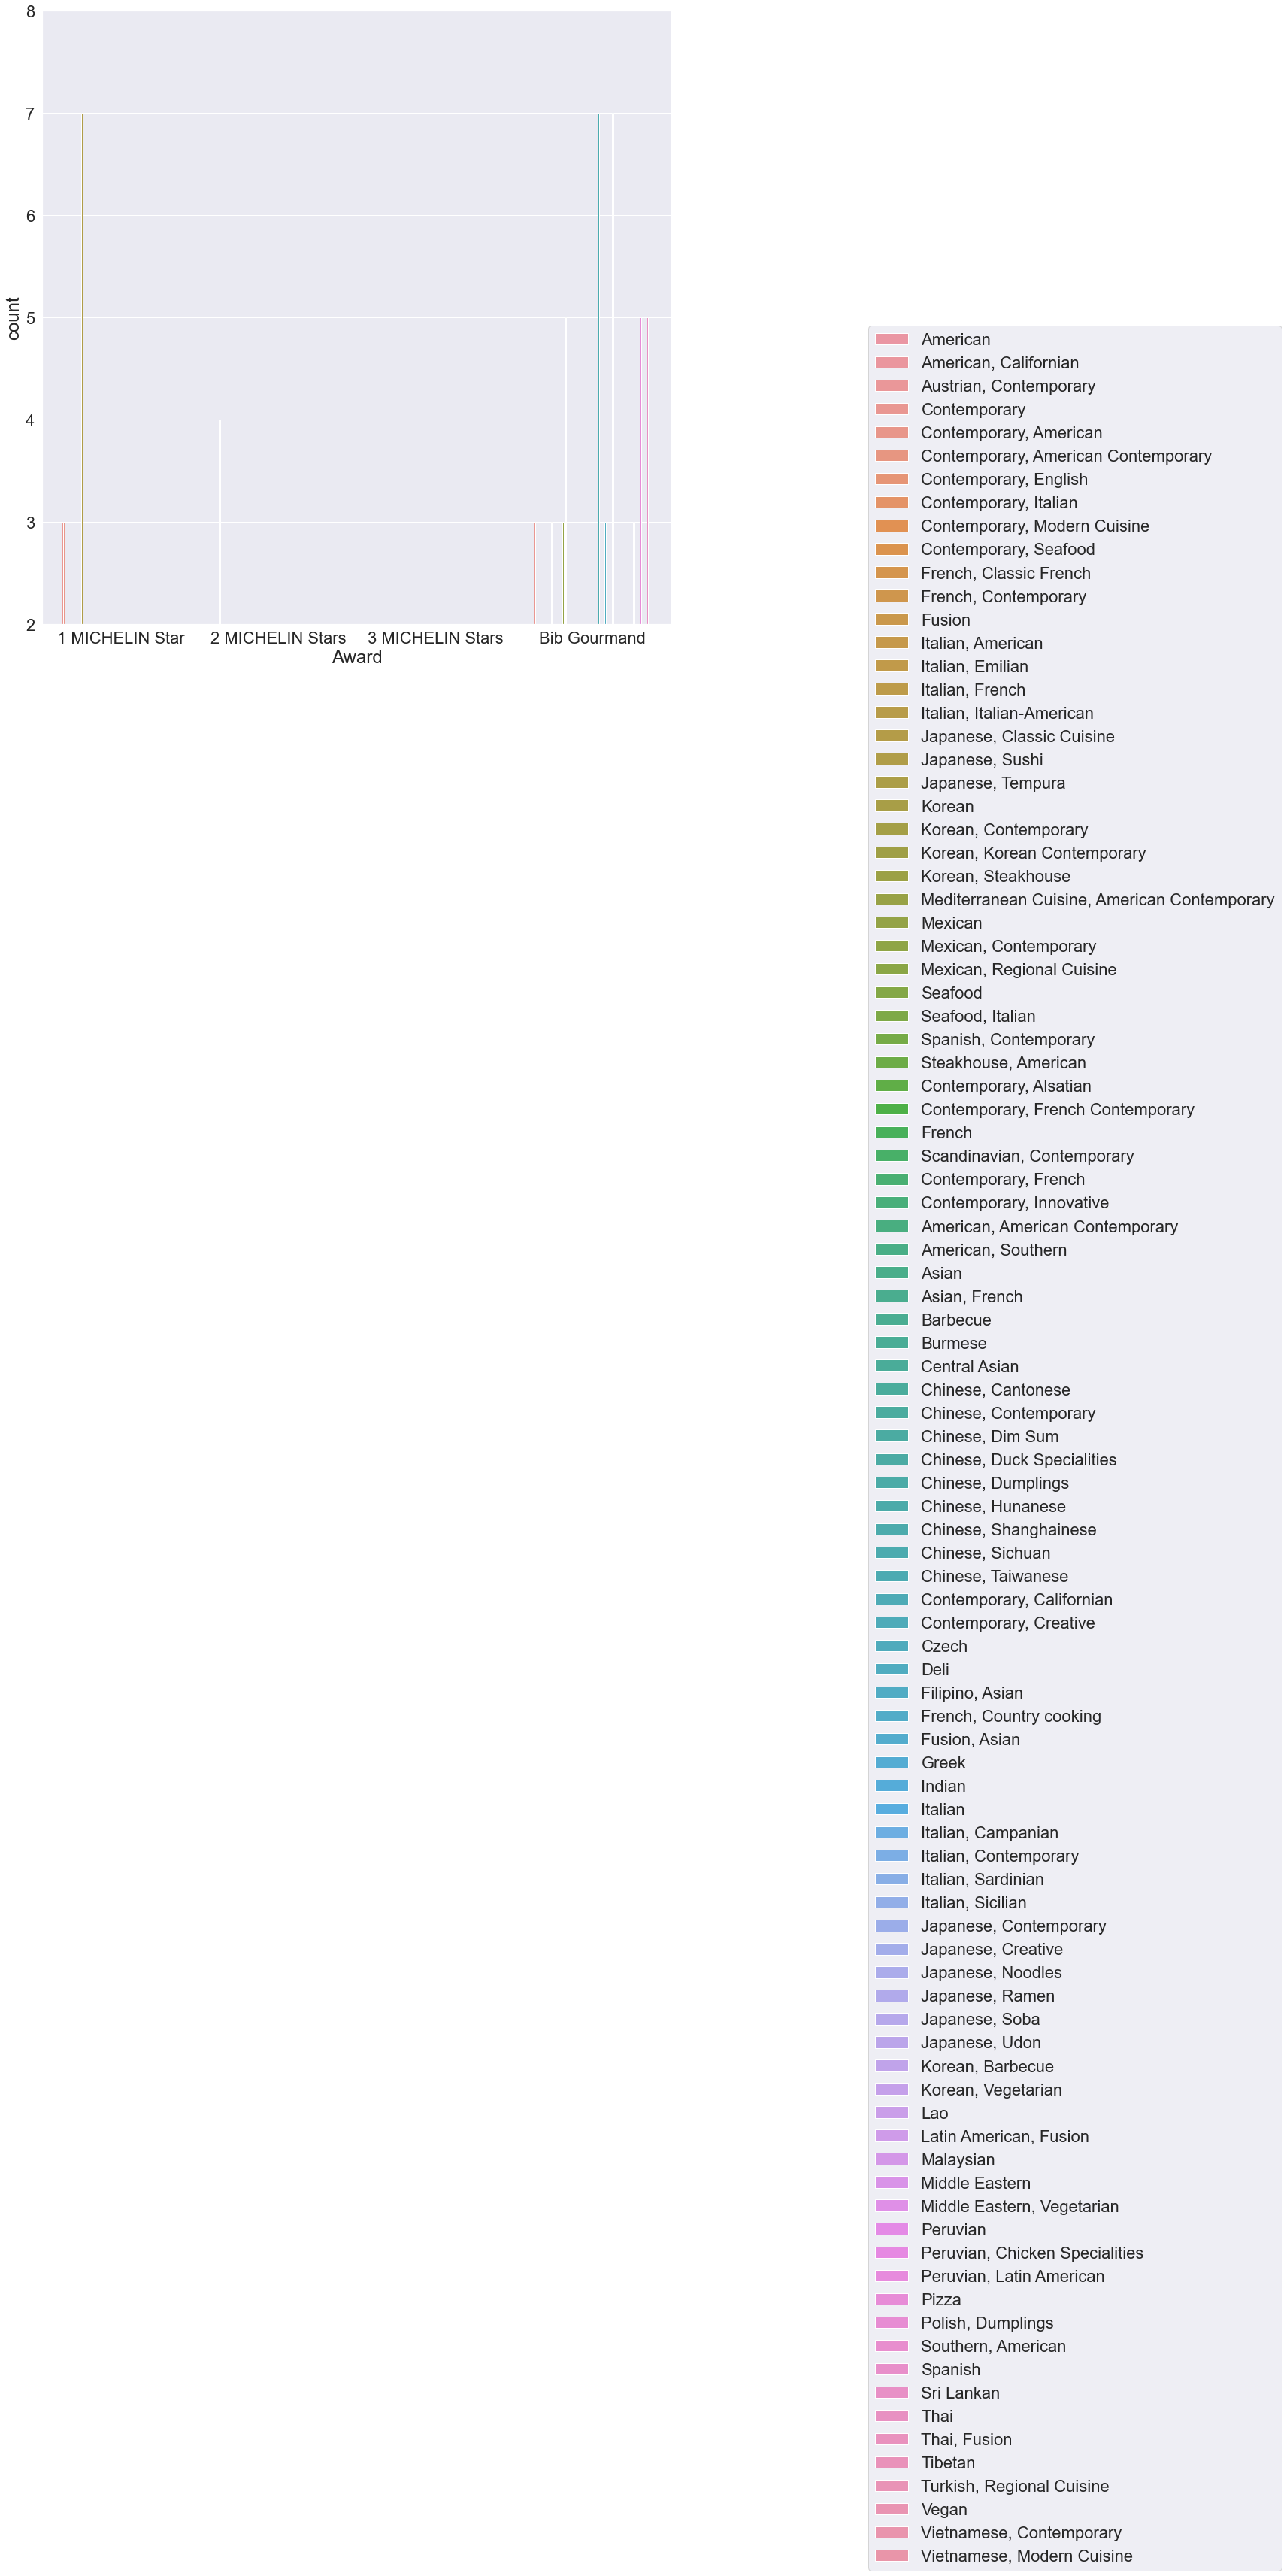

In [11]:
# for the bar plot with the cuisine breakout, we can use the groupby function and reser the y index to be rename as count
#unlike matplotlib, we have to apply themes to differentiate cuisine types 
sea_layerbar=ny.groupby(["Award","Cuisine"]).size().reset_index(name='count')
sns.barplot(data=sea_layerbar,x="Award",y="count",hue="Cuisine")
plt.ylim(2,8)
plt.legend(bbox_to_anchor = (1.3,0.5))

#### Conclusion  

For our bar plot, we can see the popularity of the cuisine type by its star value.

Bib Gorumand:Top cuisine is Italian
Three stars: Leveled field
Two Stars: Contemporary
One Stars: Japanese, Sushi

Our location map through the mutliple scatter plots show downtown NYC has the largest cluseter of these michelin star establishments next to  northeast Brooklyn.


In [12]:
ny.groupby(["Award","Cuisine"]).size().sort_values(ascending=False)[0:15]

Award             Cuisine                  
Bib Gourmand      Italian                      7
                  Chinese, Sichuan             7
1 MICHELIN Star   Japanese, Sushi              7
Bib Gourmand      Mexican, Regional Cuisine    5
                  Pizza                        5
                  Thai                         5
2 MICHELIN Stars  Contemporary                 4
Bib Gourmand      Mexican                      3
                  Middle Eastern               3
                  Contemporary                 3
                  Deli                         3
1 MICHELIN Star   Contemporary, American       3
                  Contemporary                 3
Bib Gourmand      Italian, Italian-American    3
                  Indian                       2
dtype: int64